# Dadas algunas variables climaticas en la ciudad de Munich, podemos hacer un asado?

En esta base de datos encontramos variables climaticas como nubosidad, viento, humedad, temperatura, que nos indican si el dia esta apto para hacer un asado. El objetivo de este trabajo es entrenar una red neuronal para que al ingresarle estas variables de un dia fuera de esta base de datos, pueda predecir si arrancamos el fuego o mejor nos quedamos adentro comiendo unas pastas.

En la primera parte analizaremos la base de datos para limpiarla de valores atipicos y de valores faltantes en alguna columna de cada fila, y determinar la correlacion de las variables con la salida esperada.

En la segunda parte armaremos la red neuronal con nuestros datos listos para trabajar y la entrenaremos, luego obtendremos su rendimiento en base a como performa con un subconjunto de la base de datos apartado para testing. Por ultimo haremos la comparacion de la performance de la red con una de la libreria Scikit Learn.

In [59]:
import pandas as pd
df = pd.read_csv("clima_munich.csv")

"""
ORIGINAL DATA UNITS:
CC   : cloud cover in oktas
DD   : wind direction in degrees
FG   : wind speed in 0.1 m/s
FX   : wind gust in 0.1 m/s
HU   : humidity in 1 %
PP   : sea level pressure in 0.1 hPa
QQ   : global radiation in W/m2
RR   : precipitation amount in 0.1 mm
SS   : sunshine in 0.1 Hours
TG   : mean temperature in 0.1 &#176;C
TN   : minimum temperature in 0.1 &#176;C
TX   : maximum temperature in 0.1 &#176;C


CONVERTED to:
CC   : cloud cover in oktas
DD   : wind direction in degrees
FG   : wind speed in 1 m/s
FX   : wind gust in 1 m/s
HU   : humidity in fraction of 100 %
PP   : sea level pressure in 1000 hPa
QQ   : global radiation in 100 W/m2
RR   : precipitation amount in 10 mm
SS   : sunshine in 1 Hours
TG   : mean temperature in 1 &#176;C
TN   : minimum temperature in 1 &#176;C
TX   : maximum temperature in 1 &#176;C
"""

df

,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,MUENCHEN_BBQ_weather
0,8,2.6,9.4,0.91,1.0273,0.20,0.20,0.0,1.7,-0.5,2.6,False
1,6,2.1,8.2,0.90,1.0321,0.66,0.00,6.1,1.9,-0.2,5.8,False
2,7,2.1,6.9,0.92,1.0317,0.28,0.00,0.4,-0.4,-3.3,0.9,False
3,6,2.7,11.7,0.75,1026.0000,0.58,0.04,4.5,3.8,-2.8,6.6,False
4,5,3.3,13.2,0.87,1.0248,0.26,0.00,0.2,5.3,4.3,7.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,4,3.6,16.7,0.74,1.0086,0.53,0.00,3.8,2.1,-2.6,5.5,False
3650,7,3.0,9.3,0.85,1.0048,0.19,0.44,0.0,2.0,-2.9,8.9,False
3651,8,3.1,12.3,0.84,0.9976,0.19,0.36,0.0,8.0,6.7,9.3,False
3652,7,2.5,8.6,0.87,0.9956,0.19,0.35,0.0,6.3,3.0,8.1,False


array([[<Axes: title={'center': 'MUENCHEN_cloud_cover'}>,
        <Axes: title={'center': 'MUENCHEN_wind_speed'}>,
        <Axes: title={'center': 'MUENCHEN_wind_gust'}>],
       [<Axes: title={'center': 'MUENCHEN_humidity'}>,
        <Axes: title={'center': 'MUENCHEN_pressure'}>,
        <Axes: title={'center': 'MUENCHEN_global_radiation'}>],
       [<Axes: title={'center': 'MUENCHEN_precipitation'}>,
        <Axes: title={'center': 'MUENCHEN_sunshine'}>,
        <Axes: title={'center': 'MUENCHEN_temp_mean'}>],
       [<Axes: title={'center': 'MUENCHEN_temp_min'}>,
        <Axes: title={'center': 'MUENCHEN_temp_max'}>,
        <Axes: title={'center': 'MUENCHEN_BBQ_weather'}>]], dtype=object)

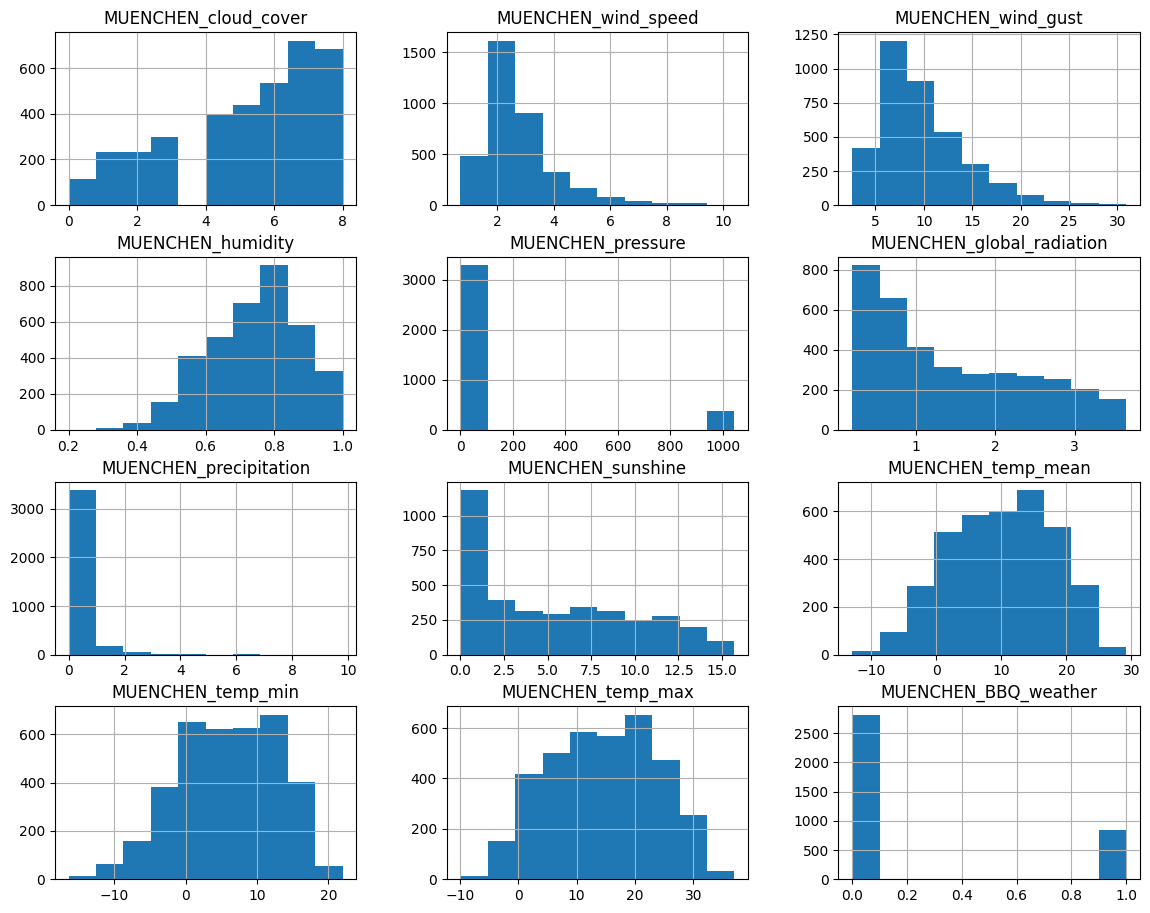

In [60]:
# Limpio el df
df = df.dropna()
df['MUENCHEN_BBQ_weather'] = df['MUENCHEN_BBQ_weather'].astype(int)

# Muestro histogramas de las variables de entrada para vizualizar valores atípicos
df.hist(figsize=(14, 11))

Vamos a eliminar valores atípicos con intercuartiles

Filas con Valores Atípicos:
 MUENCHEN_cloud_cover           0
MUENCHEN_wind_speed          185
MUENCHEN_wind_gust           111
MUENCHEN_humidity             14
MUENCHEN_pressure            390
MUENCHEN_global_radiation      0
MUENCHEN_precipitation       414
MUENCHEN_sunshine              0
MUENCHEN_temp_mean             0
MUENCHEN_temp_min              1
MUENCHEN_temp_max              0
MUENCHEN_BBQ_weather         839
dtype: int64


array([[<Axes: title={'center': 'MUENCHEN_cloud_cover'}>,
        <Axes: title={'center': 'MUENCHEN_wind_speed'}>,
        <Axes: title={'center': 'MUENCHEN_wind_gust'}>],
       [<Axes: title={'center': 'MUENCHEN_humidity'}>,
        <Axes: title={'center': 'MUENCHEN_pressure'}>,
        <Axes: title={'center': 'MUENCHEN_global_radiation'}>],
       [<Axes: title={'center': 'MUENCHEN_precipitation'}>,
        <Axes: title={'center': 'MUENCHEN_sunshine'}>,
        <Axes: title={'center': 'MUENCHEN_temp_mean'}>],
       [<Axes: title={'center': 'MUENCHEN_temp_min'}>,
        <Axes: title={'center': 'MUENCHEN_temp_max'}>,
        <Axes: title={'center': 'MUENCHEN_BBQ_weather'}>]], dtype=object)

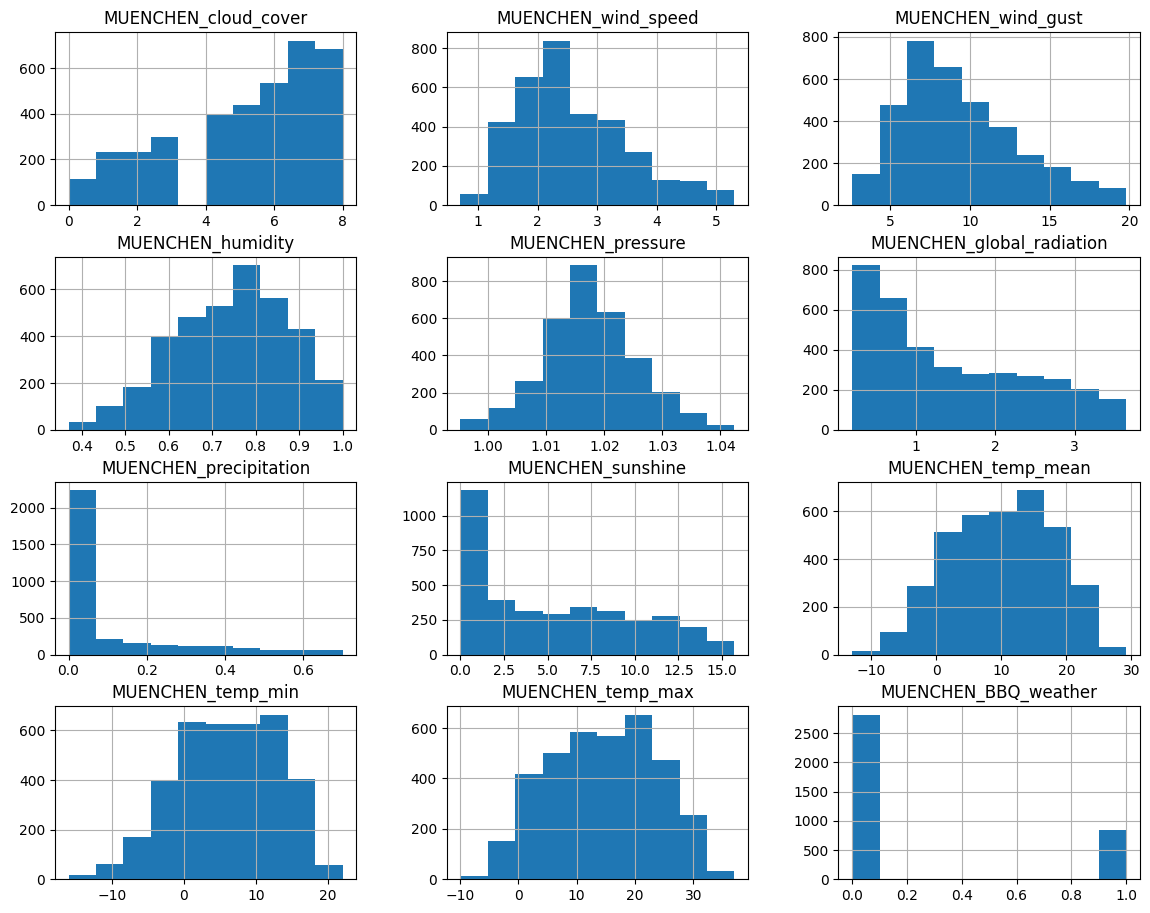

In [61]:
import seaborn as sns
import numpy as np

df_salida = df['MUENCHEN_BBQ_weather']

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:\n", num_outliers)

# Saco del dataframe las filas con valores atípicos (y reinserto la columna de salida original)
df = df.where(np.invert(outliers))
df['MUENCHEN_BBQ_weather'] = df_salida

# Histograma limpio
df.hist(figsize=(14, 11))

In [62]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
df_n.describe()

,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,MUENCHEN_BBQ_weather
count,3.654000e+03,3.469000e+03,3.543000e+03,3.640000e+03,3.264000e+03,3.654000e+03,3.240000e+03,3.654000e+03,3.654000e+03,3.653000e+03,3.654000e+03,3.654000e+03
mean,1.011172e-16,-8.193055e-18,-1.203290e-16,-5.094826e-16,1.840576e-15,7.389333e-17,8.114223e-17,9.528351e-17,-9.722807e-17,-2.334112e-17,8.167158e-17,-1.293133e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.254021e+00,-2.032637e+00,-1.855604e+00,-2.857305e+00,-2.800258e+00,-1.256607e+00,-5.792326e-01,-1.136024e+00,-2.904084e+00,-3.122292e+00,-2.665196e+00,-5.458614e-01
25%,-5.288027e-01,-7.345683e-01,-7.577885e-01,-7.153771e-01,-6.237508e-01,-8.602419e-01,-5.792326e-01,-9.836779e-01,-7.783655e-01,-7.667295e-01,-7.895480e-01,-5.458614e-01
50%,3.338067e-01,-1.937063e-01,-2.088808e-01,1.260947e-01,-4.835227e-02,-2.809398e-01,-5.792326e-01,-1.784217e-01,4.408495e-02,4.210815e-02,2.832178e-02,-5.458614e-01
75%,7.651114e-01,5.635006e-01,5.870353e-01,7.380741e-01,6.052254e-01,8.166854e-01,1.878809e-01,8.009440e-01,7.906169e-01,8.083754e-01,7.998456e-01,-5.458614e-01
max,1.196416e+00,2.943294e+00,2.865002e+00,1.962033e+00,3.103831e+00,2.259859e+00,3.551379e+00,2.280874e+00,2.422865e+00,2.269959e+00,2.449216e+00,1.831466e+00


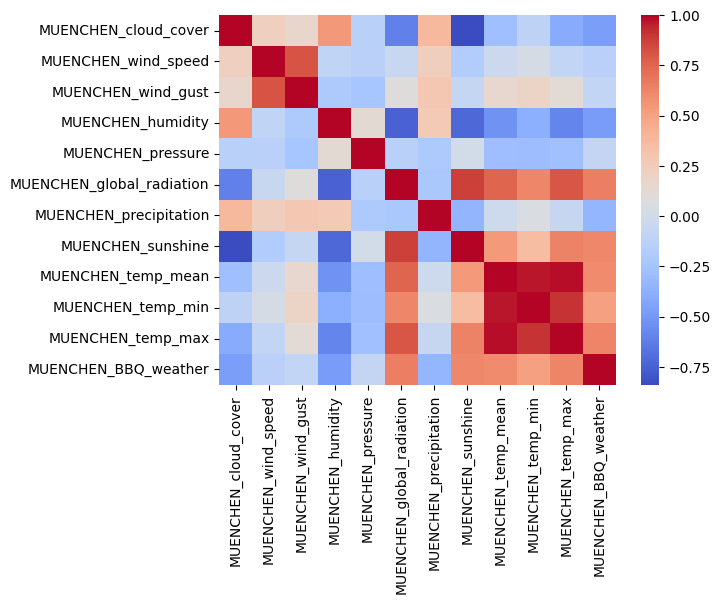

In [58]:
df = df.dropna()
df.to_csv('clima_munich_limpio.csv')

import matplotlib.pyplot as plt
correlaciones = df.corr(method="pearson")
sns.heatmap(correlaciones, cmap='coolwarm')
plt.show()

Con las entradas de temperatura, hora de salida del sol y radiación solar, vemos una correlación directa fuerte con la variable de salida.
De manera inversa se encuentra la humedad, nubosidad y precipitación.